In [1]:
from tensorflow import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import glob 
import numpy as np
from os import listdir,makedirs
from os.path import isfile,join
from numpy import *
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random
import cv2
import os 

Using TensorFlow backend.


In [5]:
path_2="/home/dashan/Desktop/modified_data"

IMG_SIZE=300

def label_img(name):
	if name[0:2]=="NL":
		return np.array([1,0])
	elif name[0:2]=="ca":
		return np.array([0,1])
def load_training_data(arg):
	train_data=[]
	DIR=path_2+"/"+arg
	for img in os.listdir(DIR):
		label=label_img(img)
		path=os.path.join(DIR,img)
		img=Image.open(path)
		img=img.convert('L')
		img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
		train_data.append([np.array(img),label])
		flip_img=Image.open(path)
		flip_img=flip_img.convert('L')
		flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
		flip_img = np.array(flip_img)
		flip_img = np.fliplr(flip_img)
		train_data.append([flip_img, label])
	shuffle(train_data)
	return train_data
a=load_training_data("1_normal")
b=load_training_data("2_cataract")

In [7]:
train_data=[]
for i in a[0:200]:
	train_data.append(i)
shuffle(train_data)
for i in b[0:200]:
	train_data.append(i)

In [8]:
train_data=[]
for i in range(150):
    train_data.append(a[i])
for i in range(150):
    train_data.append(b[i])
shuffle(train_data)
test_data=[]
val_data=[]
for i in range(150,175):
    test_data.append(a[i])
for i in range(150,175):
    test_data.append(b[i])
shuffle(test_data)

for i in range(175,200):
    val_data.append(a[i])
for i in range(175,200):
    val_data.append(b[i])
shuffle(val_data)

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0],
         [0, 0, 0, ..., 0, 1, 0],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 0, ..., 1, 1, 1],
         [1, 1, 0, ..., 1, 1, 0]], dtype=uint8),
  array([0, 1])],
 [array([[1, 0, 0, ..., 1, 1, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 1],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]], dtype=uint8),
  array([1, 0])],
 [array([[1, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 0, 0]], dtype=uint8),
  array([1, 0])],
 [array([[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 1, 0],
         [1, 1, 1, ..., 1, 0, 1],
         [1, 1, 1, ..., 1, 1, 0]], dtype=uint8),
  array([0, 1]

In [9]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [10]:
testImages =  np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

In [11]:
val_Images =  np.array([i[0] for i in val_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
val_Labels = np.array([i[1] for i in val_data])

In [16]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization

# IMG_SIZE=300
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1),kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print("compile to ho gya ")
model.summary()

compile to ho gya 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None,

In [17]:
history = model.fit(trainImages, trainLabels,
                    batch_size=10,
                    epochs=100,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(val_Images, val_Labels),verbose=1)

Train on 300 samples, validate on 50 samples
Epoch 1/100
300/300 [==============================] - 49s 162ms/step - loss: 1.7508 - accuracy: 0.5017 - val_loss: 2.7358 - val_accuracy: 0.5000
Epoch 2/100
300/300 [==============================] - 41s 138ms/step - loss: 1.4843 - accuracy: 0.5967 - val_loss: 1.4583 - val_accuracy: 0.5600
Epoch 3/100
300/300 [==============================] - 39s 130ms/step - loss: 1.2463 - accuracy: 0.7767 - val_loss: 5.1867 - val_accuracy: 0.5200
Epoch 4/100
300/300 [==============================] - 40s 134ms/step - loss: 1.2846 - accuracy: 0.7700 - val_loss: 2.7419 - val_accuracy: 0.5600
Epoch 5/100
300/300 [==============================] - 45s 149ms/step - loss: 1.1106 - accuracy: 0.8433 - val_loss: 2.4067 - val_accuracy: 0.5000
Epoch 6/100
300/300 [==============================] - 44s 146ms/step - loss: 1.1071 - accuracy: 0.8250 - val_loss: 1.8086 - val_accuracy: 0.5000
Epoch 7/100
300/300 [==============================] - 45s 148ms/step - loss: 1

300/300 [==============================] - 38s 125ms/step - loss: 0.3960 - accuracy: 0.9500 - val_loss: 4.7271 - val_accuracy: 0.5000
Epoch 57/100
300/300 [==============================] - 37s 124ms/step - loss: 0.3673 - accuracy: 0.9700 - val_loss: 1.2874 - val_accuracy: 0.7200
Epoch 58/100
300/300 [==============================] - 38s 125ms/step - loss: 0.3687 - accuracy: 0.9600 - val_loss: 2.7340 - val_accuracy: 0.5500
Epoch 59/100
300/300 [==============================] - 39s 130ms/step - loss: 0.4206 - accuracy: 0.9483 - val_loss: 0.7685 - val_accuracy: 0.7600
Epoch 60/100
300/300 [==============================] - 37s 124ms/step - loss: 0.2959 - accuracy: 0.9933 - val_loss: 0.8356 - val_accuracy: 0.7600
Epoch 61/100
300/300 [==============================] - 38s 126ms/step - loss: 0.3882 - accuracy: 0.9517 - val_loss: 1.5613 - val_accuracy: 0.7600
Epoch 62/100
300/300 [==============================] - 39s 129ms/step - loss: 0.3907 - accuracy: 0.9700 - val_loss: 10.4566 - val_

In [19]:
loss_v, accuracy_v = model.evaluate(testImages,testLabels, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy_v, loss_v))

50/50 [==============================] - 2s 45ms/step
Test: accuracy = 0.860000  ;  loss = 1.213133


['1.jpeg', 'normal.png', '5.jpeg', '3.jpeg', '4.jpeg', 'NL_002.png', '2.jpeg', '6.jpeg', '8.png']


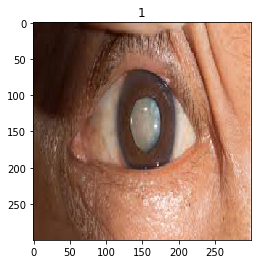

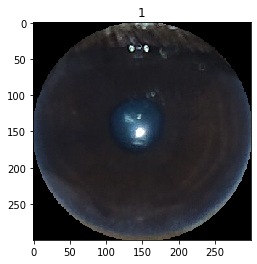

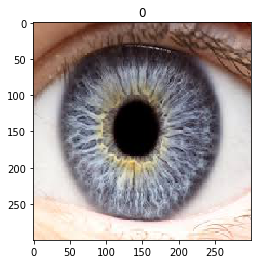

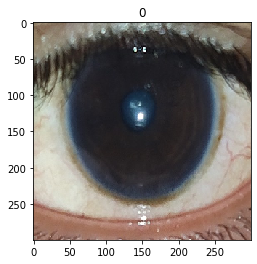

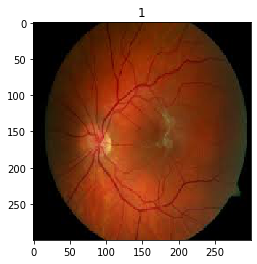

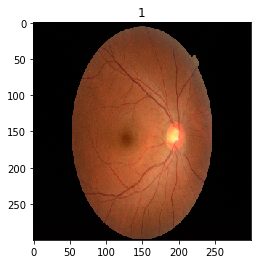

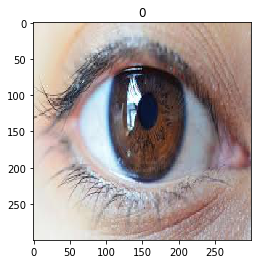

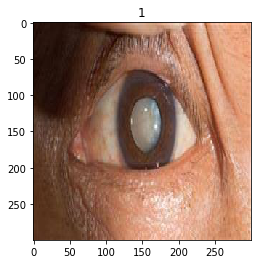

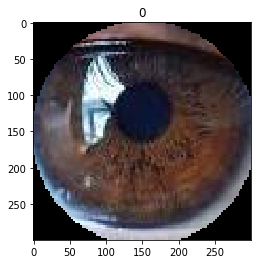

In [21]:
from keras.models import load_model
from keras.preprocessing import image
path="/home/dashan/Desktop/test"
IMG_SIZE=300
files = [f for f in listdir(path) if isfile(join(path,f))] 
print(files)
for i in files:
    img = image.load_img(path+"/"+i, target_size=(IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
#     img=img.reshape()
    # gray = cv2.resize(gray, (200,200)) 
#     gr = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x=x.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    images = np.vstack([x])
#     classes = model.predict_classes(images, batch_size=10)
    result=model.predict_classes(images)
    plt.title(result[0])
    plt.show()
#     print(classes[0])